### Clustering the Countries by using Unsupervised Learning for HELP International
**Objective:**

To categorise the countries using socio-economic and health factors that determine the overall development of the country.  
**About organization:**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.  
**Problem Statement:**

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [41]:
import pandas as pd
dataset = pd.read_csv('Data/Project/Country_Data/Country-data.csv')

In [42]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [43]:
dataset.isnull().values.any()

False

Target looks like regression


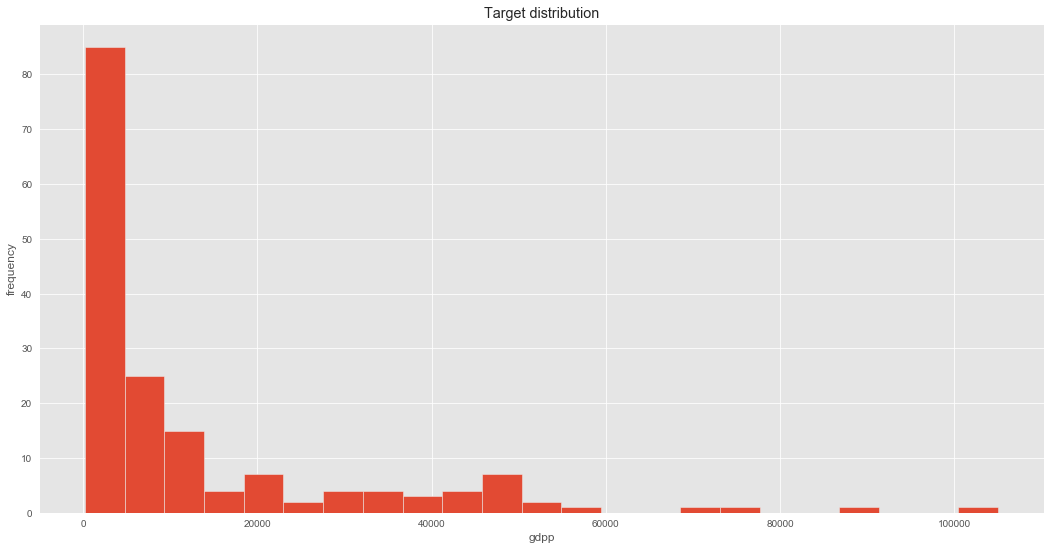

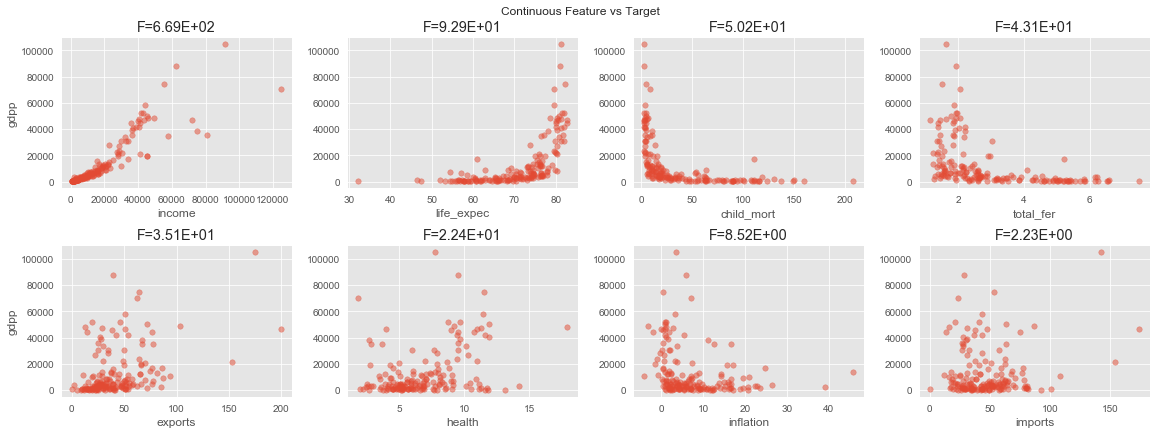

In [44]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 9)
dabl.plot(dataset, target_col = 'gdpp')

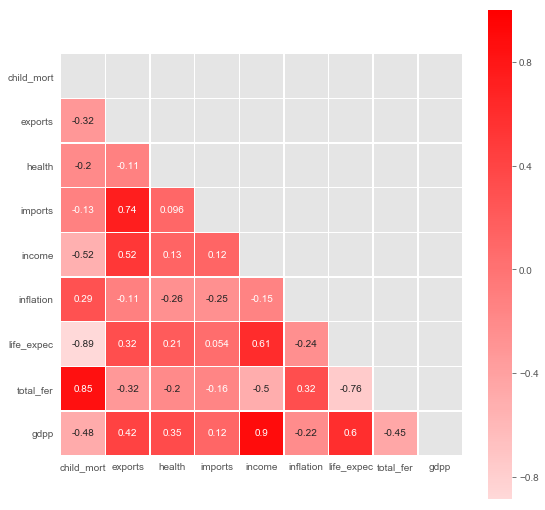

In [45]:
#More prominent correlation plot
import numpy as np
import seaborn as sns
corr_d = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.light_palette('red', as_cmap=True)
sns.heatmap(corr_d, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=0.4, cbar_kws={"shrink": 1})



We can clearly see there is strong positive correlation between gdpp and income. Also positive correlation between gdpp and "Exports","health","Life_expec",'Imports"

Above features can be categorized into two categories.  
1. Economic - exports, health, imports, income, inflation, gdpp  
2. Health - child_mort, life_expect, total_fer

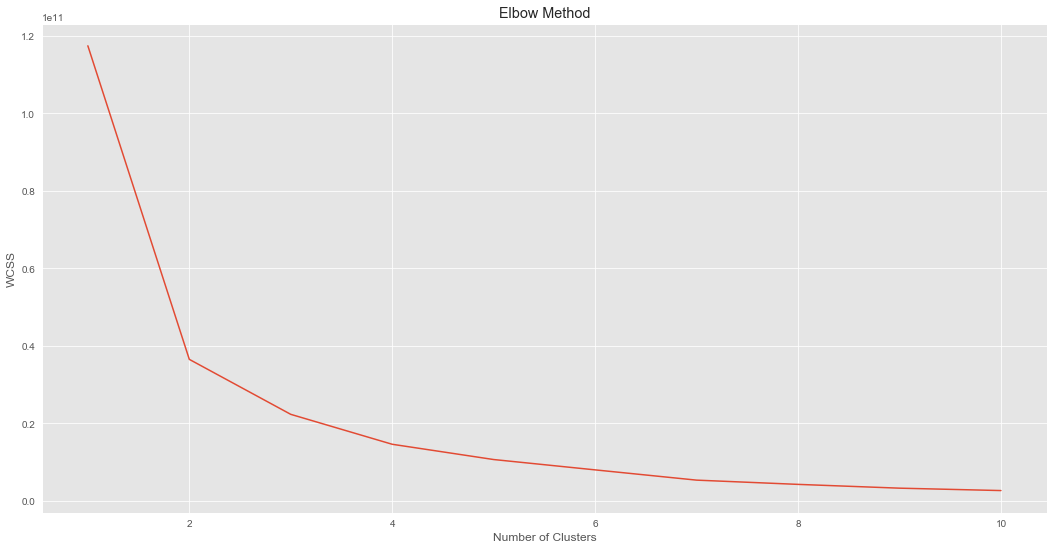

In [82]:
X = dataset.iloc[:, [2,9]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(dataset[['income','gdpp']])
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

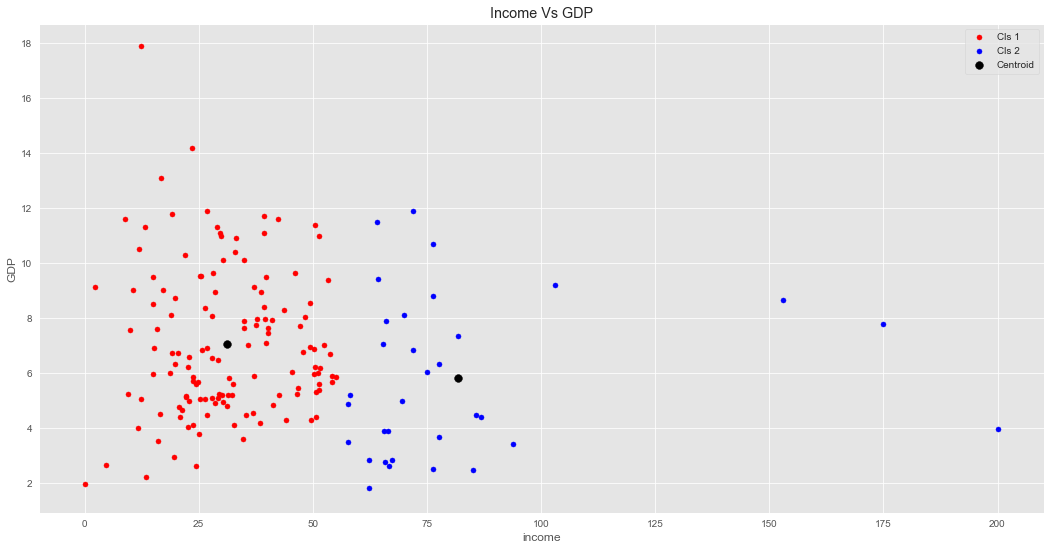

In [68]:
# Fitting K-Means to the dataset
k_means = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(X)

# Visualising the clusters
size = 25
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'red', label = 'Cls 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cls 2')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Income Vs GDP')
plt.xlabel('income')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [62]:
group = pd.DataFrame(dataset)
group['target'] = k_means.labels_
group


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


As group 0 is lower in income than group 1, so will take group 0 for further checking. Remaining feature  

    Economic - exports, health, imports, inflation
    Health - child_mort, life_expect, total_fer

This time will take health and inflation to access economic condition

In [64]:
group_0 = group[group['target'] == 0]
group_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


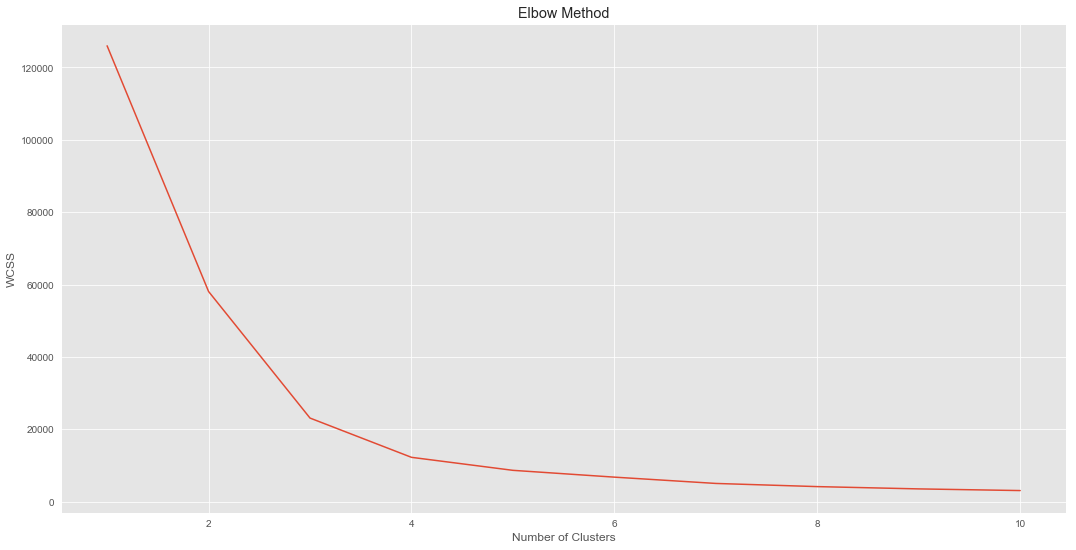

In [76]:
group_0 = dataset.iloc[:, [2,3]].values
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(group_0)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

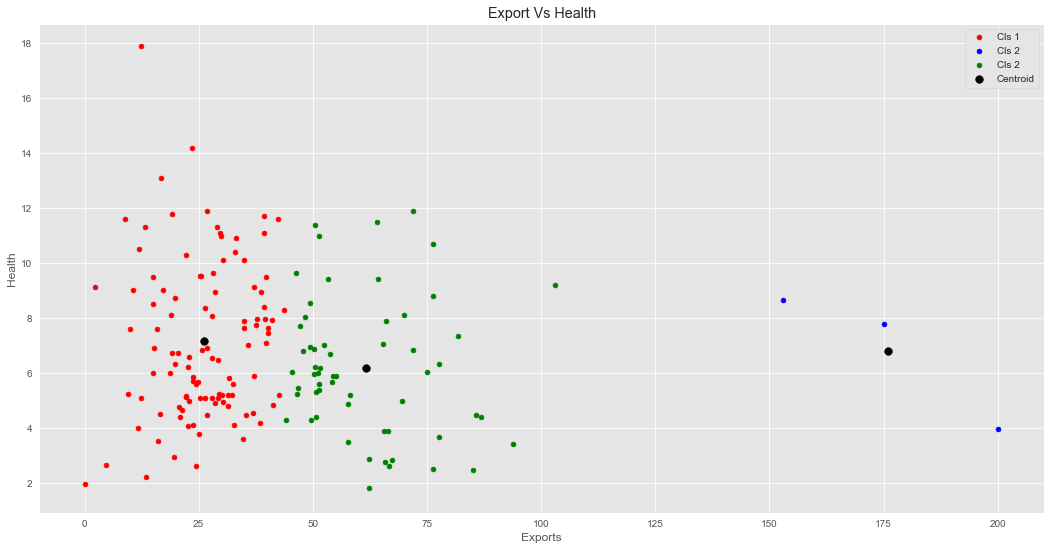

In [80]:
# Fitting K-Means to the dataset
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(group_0)

# Visualising the clusters
size = 25
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = size, c = 'red', label = 'Cls 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = size, c = 'blue', label = 'Cls 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = size, c = 'green', label = 'Cls 2')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 60, c = 'black', label = 'Centroid')
plt.title('Export Vs Health')
plt.xlabel('Exports')
plt.ylabel('Health')
plt.legend()
plt.show()

As group 0 is lower in Economic status based on health and Exports than group 1&2, so will take group 0 for further checking based on health
    Health - child_mort, life_expect, total_fer

This time will take health and inflation to access economic condition

In [81]:
group_0.drop('Labels',axis = 1,inplace = True)
group_0['target'] = k_means.labels_


AttributeError: 'numpy.ndarray' object has no attribute 'drop'